In [259]:
# from load_data import import_data
import numpy as np               # Array manipulation
import pandas as pd              # Data Manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Statistical plotting
# First we sum the number of encounters and loiterings for each carrier.
# Then make a classification: if there are more encounters than loiterings, the carrier is not suspicious, if there is more loitering, the carrier is suspicious. (Don't hard-code the cutoff. We may want to do 66% loitering and 33% encounters in the future instead of 50-50)
# For every carrier in the carriers table, label a value 1 (suspicious) or 0 (not suspicious).


def import_data():
    path = 'gfw_data-v2.xlsx'
    xls = pd.ExcelFile(path)
    dfList = []
    for sheet in ['carriers', 'encounter', 'loitering', 'encounter-v2', 'loitering-v2']:
        dfList.append(pd.read_excel(path, sheet_name=sheet))
    return dfList

In [141]:
carriers, encounter, loitering, encounter2, loitering2 = import_data()

In [188]:
# def classify(carriers, encounter, loitering, cutoff = 0.5):
#     '''
#     Input: Global Fishing Watch data
#     Output: Adds column to each reefer indicating whether they are suspicious of IUU or not
#     '''

#     # count the num of encounter/loitering for each carrier
#     num_encounter = []
#     num_loitering = []
#     for i in carriers.id:
#         num_encounter.append(encounter[encounter['vessel1_id']==i].shape[0])
#         num_loitering.append(loitering[loitering['vessel_id']==i].shape[0])

#     # append the num info into new column in carrier table
#     carrier = carriers.assign(encounter = num_encounter, loitering = num_loitering)
#     # if cutoff*encounter >= (1-cutoff)*loitering then we set label = 0 as unsuspicious
#     # if cutoff*encounter < (1-cutoff)*loitering then we set label = 1 as suspicious
#     carrier['label'] = ((cutoff*carrier['encounter'] - (1-cutoff)*carrier['loitering']) < 0).astype(int)
#     return carrier

# def change_cutoff(data, cutoff = 0.5):
#     data['label'] = ((cutoff*data['encounter'] - (1-cutoff)*data['loitering']) < 0).astype(int)
#     return data

In [189]:
# classified_data = classify(carriers, encounter, loitering, 0.66)

In [190]:
# classified_data.head()

In [191]:
# classified_data['label'].sum()

In [192]:
# classified_data['label'].count()

In [193]:
# a = change_cutoff(classified_data, 0.99)

In [194]:
# a['label'].sum()

In [195]:
# carriers

In [ ]:
# num_encounter2 = []
# num_loitering2 = []
# for i in carriers.id:
# #     num_encounter2.append(encounter2[encounter2['vessel.id']==i].shape[0] + encounter2[encounter2['encounter.encountered_vessel.id']==i].shape[0])
#     num_loitering2.append(loitering2[loitering2['vessel.id']==i].shape[0])

# # append the num info into new column in carrier table
# carrier = carriers.assign(encounter2 = num_encounter2, loitering2 = num_loitering2)

In [ ]:
# carrier

In [ ]:
# loitering2

# Encounter Merging

In [143]:
encounter.columns

Index(['event_id', 'event_type', 'event_start', 'event_end', 'event_lat',
       'event_lon', 'mpa', 'eez', 'rfmo', 'fao', 'major_fao', 'eez12nm',
       'boundingBox', 'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm', 'vessel1_id',
       'vessel1_flag', 'vessel1_name', 'vessel1_type', 'vessel1_ssvid',
       'vessel2_id', 'vessel2_flag', 'vessel2_name', 'vessel2_type',
       'vessel2_ssvid', 'medianDistanceKilometers', 'medianSpeedKnots',
       'encounter_type'],
      dtype='object')

In [144]:
encounter2.columns

Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type',
       'vessel.mmsi', 'vessel.name', 'vessel.flag',
       'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_shore_m',
       'distance_from_port_m', 'regions.rfmo', 'encounter.median_distance_km',
       'encounter.authorization_status', 'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'encounter.encountered_vessel.origin_port.country',
       'encounter.encountered_vessel.origin_port.name',
       'encounter.encountered_vessel.destination_port.country',
       'encounter.encountered_vessel.destination_port.name',
       'encount

In [242]:
encounter.columns = ['id', 'type', 'start', 'end', 'lat', 'lon','mpa', 'eez', 'regions.rfmo','fao', 'major_fao', 'eez12nm',
       'boundingBox', 'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm','vessel.id','vessel.flag','vessel.name','vessel.type','vessel.mmsi',
                  'encounter.encountered_vessel.id', 'encounter.encountered_vessel.flag', 'encounter.encountered_vessel.name',
                    'encounter.encountered_vessel.type','encounter.encountered_vessel.mmsi','medianDistanceKilometers', 'medianSpeedKnots',
       'encounter_type']

In [246]:
# encounter['distance_from_shore_m'] = encounter['distance_from_shore_m']/1000
encounter['distance_from_shore_m'] = (encounter['startDistanceFromPortKm']+encounter['endDistanceFromPortKm'])/2*1000
encounter['distance_from_shore_m']

0          53563.391
1          53563.391
2          14490.616
3          14490.616
4          32078.514
             ...    
116395    159376.156
116396    162881.797
116397    162881.797
116398    162740.422
116399    162740.422
Name: distance_from_shore_m, Length: 116400, dtype: float64

In [252]:
tmp2 = pd.merge(encounter, encounter2, how = 'outer', left_on='id', right_on='id',suffixes=('', '_!!!'))
print(len(tmp2.columns))
a =['type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type','vessel.flag', 'vessel.mmsi','vessel.name','distance_from_shore_m',"regions.rfmo",
   'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag']
b= ['type_!!!', 'start_!!!', 'end_!!!', 'lat_!!!', 'lon_!!!',
       'vessel.id_!!!', 'vessel.type_!!!','vessel.flag_!!!', 'vessel.mmsi_!!!',
       'vessel.name_!!!','distance_from_shore_m_!!!','regions.rfmo_!!!',
   'encounter.encountered_vessel.id_!!!',
       'encounter.encountered_vessel.type_!!!',
       'encounter.encountered_vessel.mmsi_!!!',
       'encounter.encountered_vessel.name_!!!',
       'encounter.encountered_vessel.flag_!!!',]

print(tmp2['type'].isna().sum())
for c in range(len(a)):
    tmp2[a[c]].fillna(tmp2[b[c]], inplace=True)
tmp2.loc[:, ~tmp2.columns.str.endswith('_!!!')].columns
print(tmp2['type'].isna().sum())

71
57807
0


In [150]:
(encounter['encounter.encountered_vessel.id'].isin(encounter2['encounter.encountered_vessel.id'])).sum()
(encounter['vessel.id'].isin(encounter2['encounter.encountered_vessel.id'])).sum()

dfdf = encounter[~((encounter['start'].isin(encounter2['start'])) & (encounter['vessel.id'].isin(encounter2['vessel.id'])) & (encounter['encounter.encountered_vessel.id'].isin(encounter2['encounter.encountered_vessel.id'])))]
dfdf = dfdf[~((dfdf['start'].isin(encounter2['start'])) & (dfdf['vessel.id'].isin(encounter2['encounter.encountered_vessel.id'])) & (dfdf['vessel.id'].isin(encounter2['encounter.encountered_vessel.id'])))]
dfdf

,id,type,start,end,lat,lon,mpa,eez,regions.rfmo,fao,...,vessel.type,vessel.mmsi,encounter.encountered_vessel.id,encounter.encountered_vessel.flag,encounter.encountered_vessel.name,encounter.encountered_vessel.type,encounter.encountered_vessel.mmsi,medianDistanceKilometers,medianSpeedKnots,encounter_type
2,bbc225900674c6a9c9d27fcfdb5600d9.1,encounter,2022-09-20 07:00:00,2022-09-20 23:50:00,62.9143,179.4136,NaN,5690,"IWC, PICES, ACAP",61,...,fishing,273240400,f7ebe6fa3-3640-5c7f-17c2-83423449bb1e,RUS,VITALIY SHMYKOV,carrier,273356290,0.049,0.015,fishing-carrier
3,bbc225900674c6a9c9d27fcfdb5600d9.2,encounter,2022-09-20 07:00:00,2022-09-20 23:50:00,62.9143,179.4136,NaN,5690,"PICES, ACAP, IWC",61,...,carrier,273356290,5ddb64d7e-ec33-e20d-7265-c717e3c59313,RUS,AHTIAR,fishing,273240400,0.049,0.015,carrier-fishing
4,30b519732007d7631f6f5fcc84049eee.2,encounter,2022-09-20 15:10:00,2022-09-20 20:30:00,48.7694,140.6118,NaN,5690,"IWC, ACAP, WCPFC, PICES",61,...,fishing,273433540,489bfeb6d-d541-4161-1236-a1d70a89f03d,RUS,DRUZHBA,carrier,273895510,0.022,0.691,fishing-carrier
5,30b519732007d7631f6f5fcc84049eee.1,encounter,2022-09-20 15:10:00,2022-09-20 20:30:00,48.7694,140.6118,NaN,5690,"WCPFC, ACAP, IWC, PICES",61,...,carrier,273895510,9b97aea07-748b-3980-155a-16708547d87b,RUS,SAPFIR-1,fishing,273433540,0.022,0.691,carrier-fishing
6,62c26fb35ff2e311e3de947a1816fa9d.1,encounter,2022-09-18 16:10:00,2022-09-20 20:10:00,62.2185,177.3961,NaN,5690,"PICES, IWC, ACAP",61,...,fishing,273896300,bb4deba8f-fa0b-a431-09fa-9b8486e05900,RUS,VOLKHOV,carrier,273432430,0.043,1.367,fishing-carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114714,505bc1c356bc9d89430f09a2b7eeef7e.1,encounter,2013-05-16 03:30:00,2013-05-16 23:50:00,60.2419,-144.9064,306882,8463,"ACAP, IWC, PICES, IPHC",67,...,carrier,5004,bf4c2be79-9fe2-8ec3-f483-eef1943e21dc,USA,CHELSEA,fishing,369519000,0.164,0.002,carrier-fishing
115220,101e1c04cc21792c3ed54bf03a5e72b8.1,encounter,2013-01-31 21:10:00,2013-01-31 23:40:00,-6.4740,153.8343,NaN,8324,"SPC, WCPFC, ACAP, IWC, FFA",71,...,fishing,444042912,fcafb1c35-56cf-c3fc-f26a-10a06da06efc,VUT,OCEANUS,carrier,576507000,0.292,1.138,fishing-carrier
115221,101e1c04cc21792c3ed54bf03a5e72b8.2,encounter,2013-01-31 21:10:00,2013-01-31 23:40:00,-6.4740,153.8343,NaN,8324,"ACAP, IWC, WCPFC, FFA, SPC",71,...,carrier,576507000,8a709d9be-ede1-cb17-8532-23c9823d1480,NaN,ELSPETH,fishing,444042912,0.292,1.138,carrier-fishing
116296,336f5af6ae0e7291d9d719e9c92ffadf.1,encounter,2012-02-15 01:30:00,2012-02-15 06:10:00,-12.2030,61.8748,NaN,NaN,"IOTC, IWC, SIOFA, ACAP","51, 51.7",...,carrier,352373000,a7256d289-9347-9f3e-1c8e-1ce4d9fd8fbc,NaN,HSIANG FA 26,fishing,424426611,0.046,0.563,carrier-fishing


In [187]:
# encounter.count()

In [251]:
frames = [encounter2,dfdf]

result = pd.concat(frames)
len(result.columns)

54

In [253]:
compression_opts2 = dict(method='zip',
                        archive_name='new_encounter.csv')  
tmp2.to_csv('new_encounter.zip', index=False,
          compression=compression_opts2)  

# Loitering Merging

In [179]:
loitering.columns

Index(['event_id', 'event_type', 'event_start', 'event_end', 'event_lat',
       'event_lon', 'mpa', 'eez', 'rfmo', 'fao', 'major_fao', 'eez12nm',
       'boundingBox', 'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm', 'vessel_id',
       'vessel_name', 'vessel_type', 'vessel_ssvid', 'totalTimeHours',
       'totalDistanceKm', 'averageSpeedKnots', 'averageDistanceFromShoreKm'],
      dtype='object')

In [180]:
loitering2.columns

Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type',
       'vessel.mmsi', 'vessel.name', 'vessel.flag',
       'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_shore_m',
       'distance_from_port_m', 'regions.rfmo', 'encounter.median_distance_km',
       'encounter.authorization_status', 'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'encounter.encountered_vessel.origin_port.country',
       'encounter.encountered_vessel.origin_port.name',
       'encounter.encountered_vessel.destination_port.country',
       'encounter.encountered_vessel.destination_port.name',
       'encount

In [203]:
loitering.columns = ['id', 'type', 'start', 'end', 'lat', 'lon','mpa', 'eez', 'regions.rfmo','fao', 'major_fao', 'eez12nm',
       'boundingBox', 'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm','vessel.id','vessel.name','vessel.type','vessel.mmsi',
                     'totalTimeHours',
       'totalDistanceKm', 'averageSpeedKnots', 'distance_from_shore_m']

0          552000.0
1          464000.0
2          819000.0
3          566000.0
4          432000.0
            ...    
237430     132000.0
237431     709000.0
237432      69000.0
237433    1294000.0
237434      97000.0
Name: distance_from_shore_m, Length: 237435, dtype: float64

In [216]:
# loitering['distance_from_shore_m'] = loitering['distance_from_shore_m']*1000

In [232]:
tmp = pd.merge(loitering, loitering2, how = 'outer', left_on='id', right_on='id',suffixes=('', '_!!!'))
tmp.columns
a =['type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type', 'vessel.mmsi','vessel.name','distance_from_shore_m',"regions.rfmo"]
b= ['type_!!!', 'start_!!!', 'end_!!!', 'lat_!!!', 'lon_!!!',
       'vessel.id_!!!', 'vessel.type_!!!', 'vessel.mmsi_!!!',
       'vessel.name_!!!','distance_from_shore_m_!!!','regions.rfmo_!!!']
print(tmp['type'].isna().sum())
for c in range(len(a)):
    tmp[a[c]].fillna(tmp[b[c]], inplace=True)
tmp.loc[:, ~tmp.columns.str.endswith('_!!!')].columns

1867


Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'mpa', 'eez',
       'regions.rfmo', 'fao', 'major_fao', 'eez12nm', 'boundingBox',
       'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm', 'vessel.id',
       'vessel.name', 'vessel.type', 'vessel.mmsi', 'totalTimeHours',
       'totalDistanceKm', 'averageSpeedKnots', 'distance_from_shore_m',
       'vessel.flag', 'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_port_m',
       'encounter.median_distance_km', 'encounter.authorization_status',
       'encounter.encountered_vessel.id', 'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'en

In [210]:
frames2 = [loitering2,loitering]

result2 = pd.concat(frames2)

In [211]:
len(result2.columns)

54

In [197]:
# compression_opts = dict(method='zip',
#                         archive_name='loitering.csv')  
# result2.to_csv('loitering.zip', index=False,
#           compression=compression_opts)  

In [198]:
# loitering[~loitering['id'].isin(loitering2['id'])]

In [199]:
# loitering2['id'].count()

In [201]:
frames3 = [loitering2,loitering[~loitering['id'].isin(loitering2['id'])]]

result3 = pd.concat(frames3)

In [233]:
compression_opts0 = dict(method='zip',
                        archive_name='new_loitering.csv')  
tmp.to_csv('new_loitering.zip', index=False,
          compression=compression_opts0)

# Visit merging

In [154]:
def import_data2():
    path = 'gfw_data-v2.xlsx'
    xls = pd.ExcelFile(path)
    dfList = []
    for sheet in ['carrier_port_visit', 'carrier_port_visit-v2']:
        dfList.append(pd.read_excel(path, sheet_name=sheet))
    return dfList

carrier_port_visit, carrier_port_visit2 = import_data2()

In [158]:
carrier_port_visit = carrier_port_visit.drop_duplicates(subset=['event_id'])

In [159]:
carrier_port_visit.columns

Index(['event_id', 'event_type', 'event_start', 'event_end', 'event_lat',
       'event_lon', 'mpa', 'eez', 'rfmo', 'fao', 'major_fao', 'eez12nm',
       'boundingBox', 'startDistanceFromShoreKm', 'endDistanceFromShoreKm',
       'startDistanceFromPortKm', 'endDistanceFromPortKm', 'vessel_id',
       'vessel_flag', 'vessel_name', 'vessel_type', 'vessel_ssvid', 'visitId',
       'confidence', 'durationHrs', 'anchorage_id', 'at_dock',
       'distance_from_shore_km', 'flag', 'id', 'lat', 'lon', 'name',
       'top_destination', 'anchorage_id1', 'at_dock1',
       'distance_from_shore_km1', 'flag1', 'id1', 'lat1', 'lon1', 'name1',
       'top_destination1', 'anchorage_id2', 'at_dock2',
       'distance_from_shore_km2', 'flag2', 'id2', 'lat2', 'lon2', 'name2',
       'top_destination2'],
      dtype='object')

In [168]:
carrier_port_visit2 = carrier_port_visit2[carrier_port_visit2.columns[:11].append(carrier_port_visit2.columns[-4:])]
carrier_port_visit2.columns

Index(['id', 'type', 'start', 'end', 'lat', 'lon', 'vessel.id', 'vessel.type',
       'vessel.mmsi', 'vessel.name', 'vessel.flag', 'port.lat', 'port.lon',
       'port.country', 'port.name'],
      dtype='object')

In [169]:
carrier_port_visit2.columns = ['event_id', 'event_type', 'event_start', 'event_end', 'event_lat',
       'event_lon','vessel_id', 'vessel_type','vessel_ssvid','vessel_name', 'vessel_flag', 'lat','lon','flag','name']

In [175]:
carrier_port_visit2 = carrier_port_visit2[~carrier_port_visit2['event_id'].isin(carrier_port_visit['event_id'])]

In [176]:
framesvisit = [carrier_port_visit,carrier_port_visit2]

resultvisit = pd.concat(framesvisit)

In [177]:
resultvisit

,event_id,event_type,event_start,event_end,event_lat,event_lon,mpa,eez,rfmo,fao,...,top_destination1,anchorage_id2,at_dock2,distance_from_shore_km2,flag2,id2,lat2,lon2,name2,top_destination2
0,f75c1b7d6dc67654840eaa20760cbb76,port_visit,2012-01-01 10:25:07,2012-01-01 11:01:08,60.185100,-1.079800,NaN,5696,"ICCAT, NEAFC, IWC, ACAP, NASCO, NAMMCO, ICES","27, 27.4, 27.4.a",...,PILOT DUTIES LERWICK,489e8ac5,True,1.0,GBR,gbr-lerwick,60.191896,-1.096671,NaN,LERWICK
2,9e9acaba388609d754f0ab3e6dcfc111,port_visit,2012-01-01 17:41:08,2012-01-03 13:16:24,52.159100,3.788000,NaN,5668,"NASCO, NAMMCO, ACAP, ICCAT, IWC, ICES, NEAFC","27.4, 27.4.c, 27",...,ROTTERDAM,47c516d9,False,33.0,NLD,nld-rotterdam,52.178980,3.670723,NaN,ROTTERDAM
4,b467df2426f549e7b9964b22293cbfa1,port_visit,2012-01-02 13:02:47,2012-01-02 17:07:43,52.481700,4.520600,NaN,5668,"NAMMCO, NEAFC, ACAP, ICES, NASCO, ICCAT, IWC","27, 27.4.c, 27.4",...,VELSEN,47c585cf,False,24.0,NLD,nld-amsterdam,52.529468,4.217213,AMSTERDAM,AMSTERDAM
6,69c9c90191ec34a8270a78afde0d0745,port_visit,2012-01-02 13:12:38,2012-01-05 21:20:35,60.140500,-1.136100,NaN,5696,"IWC, ICCAT, NEAFC, NASCO, NAMMCO, ICES, ACAP","27.4, 27.4.a, 27",...,PILOT DUTIES LERWICK,489e8ba3,True,0.0,GBR,gbr-lerwick,60.153944,-1.140599,LERWICK,LERWICK SAR
8,04f1308279e550f4259ef59816f46438,port_visit,2012-01-02 13:12:58,2012-01-04 09:15:38,34.118100,-119.207100,NaN,8456,"IWC, PICES, IATTC, ACAP",77,...,HUENEME,80e84fb5,True,0.0,USA,usa-porthueneme,34.148097,-119.204638,PORT HUENEME,HUENEME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643484,0e7b14c243a93041c4c06adabd3e8980,port,2014-01-04 09:49:16,2014-01-08 10:50:51,20.755195,-17.061572,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643485,eccf74a3775010a62c7ef191e782a7c9,port,2014-01-04 00:53:46,2014-01-05 05:03:33,51.298117,4.315254,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643486,8c1808a4e82bac8d3f8c0db47d38fee8,port,2014-01-04 19:59:22,2014-01-05 05:12:58,53.978864,-166.412531,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643487,007253fe7ffa79318ff1ab60ccff4fd0,port,2014-01-04 21:10:29,2014-01-05 22:10:48,53.934971,-166.492739,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
compression_opts3 = dict(method='zip',
                        archive_name='new_carrier_port_visit.csv')  
resultvisit.to_csv('new_carrier_port_visit_merge.zip', index=False,
          compression=compression_opts3) 

In [112]:
carrier_port_visit['event_id'].isin(carrier_port_visit2['id']).sum()

18278

In [113]:
carrier_port_visit2

,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,vessel.name,...,encounter.encountered_vessel.destination_port.country,encounter.encountered_vessel.destination_port.name,encounter.encountered_vessel.authorizations.authorized,encounter.encountered_vessel.authorizations.unknown,loitering.total_distance_km,loitering.loitering_hours,port.lat,port.lon,port.country,port.name
0,af03d0b85979b8c91ae5ea165d0fd2e0,port,2012-10-24 12:21:05 UTC,2012-10-24 21:07:44 UTC,18.460661,-66.111945,3fe8729f8-80c4-2d9b-70cb-02aa09353f4e,carrier,311295000,DOLE ASIA,...,NaN,NaN,NaN,NaN,NaN,NaN,18.460661,-66.111945,PRI,SAN JUAN
1,76c123fc888c38f8424d444308e74739,port,2012-10-24 10:00:48 UTC,2012-10-26 14:49:48 UTC,8.024300,-76.780133,b3089e7df-fd55-d6e8-2292-e7bb093023fe,carrier,308090000,HELLAS STREAM,...,NaN,NaN,NaN,NaN,NaN,NaN,8.024300,-76.780133,COL,TURBO
2,a3910ba2f8e734f7343fe2c3886e031a,port,2012-10-24 23:02:21 UTC,2012-10-25 16:23:59 UTC,62.777300,6.917326,1c3ee5f35-5189-56ac-07a5-a99a6624b7aa,carrier,311411000,SAMSKIP ICE,...,NaN,NaN,NaN,NaN,NaN,NaN,62.777300,6.917326,NOR,NaN
3,c3bf496236204dead751072c35d5fefc,port,2012-10-24 14:57:38 UTC,2012-10-25 16:49:53 UTC,-16.990203,-72.142333,65032eb47-732f-946e-ea32-03567b0cefd8,carrier,636011106,BALTIC PRIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,-16.990203,-72.142333,PER,MATARANI
4,ef23a729101f8d93679a51697754c7c3,port,2012-10-24 07:15:58 UTC,2012-10-25 09:39:17 UTC,52.874624,158.663179,6fc826893-3007-30a2-8cb3-dea6f5087bc0,carrier,273845620,POGRANICHNIK_ZMEEV,...,NaN,NaN,NaN,NaN,NaN,NaN,52.874624,158.663179,RUS,PETROPAVLOVSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643485,eccf74a3775010a62c7ef191e782a7c9,port,2014-01-04 00:53:46 UTC,2014-01-05 05:03:33 UTC,51.298117,4.315254,f3bef3860-009c-e707-8995-895e9942e745,carrier,566060000,STAR ENDEAVOUR I,...,NaN,NaN,NaN,NaN,NaN,NaN,51.298117,4.315254,BEL,ANTWERP
643486,8c1808a4e82bac8d3f8c0db47d38fee8,port,2014-01-04 19:59:22 UTC,2014-01-05 05:12:58 UTC,53.978864,-166.412531,b59de4765-59b0-b4bf-b763-1ab505626338,carrier,368313000,PACIFIC VENTURE,...,NaN,NaN,NaN,NaN,NaN,NaN,53.978864,-166.412531,USA,DUTCH HARBOR
643487,007253fe7ffa79318ff1ab60ccff4fd0,port,2014-01-04 21:10:29 UTC,2014-01-05 22:10:48 UTC,53.934971,-166.492739,f2b87e8b9-994a-d4f5-43f0-2603490b5e2d,carrier,367151060,KEVLEEN K,...,NaN,NaN,NaN,NaN,NaN,NaN,53.934971,-166.492739,USA,DUTCH HARBOR
643488,fcec23ab8f3892b6d258d6c5ca4ca558,port,2014-01-04 13:26:44 UTC,2014-01-14 03:38:46 UTC,45.287153,14.406227,dd8ce3711-1009-7679-24b1-4582c408ec4c,carrier,314233000,BOSSE,...,NaN,NaN,NaN,NaN,NaN,NaN,45.287153,14.406227,HRV,RIJEKA LUKA


# Reefer Analysis


In [254]:
dfimo = pd.read_csv('top10percent.csv', usecols=['imo'])
bad = dfimo['imo'].unique()

In [258]:
carriers['bad'] = carriers['imo'].isin(bad)

<Figure size 432x288 with 0 Axes>

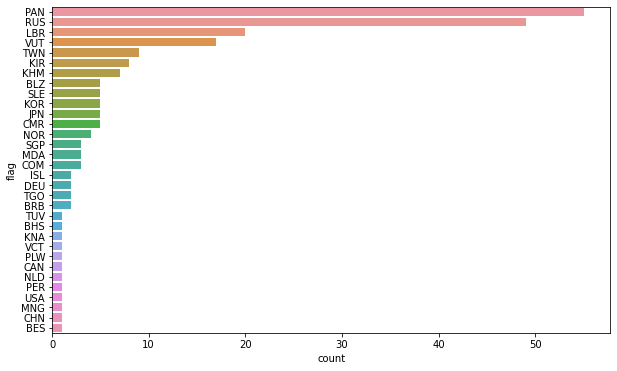

In [288]:
plt.clf()
fig, ax = plt.subplots( figsize=(10, 6))
sns.countplot(y = 'flag',
              data = carriers[carriers['imo'].isin(bad)],
              order = carriers[carriers['imo'].isin(bad)]['flag'].value_counts().index,
              ax = ax)

# sns.countplot(y = 'flag',
#               data = carriers,
#               order = carriers['flag'].value_counts().index,
#              ax = ax[1])
plt.show()

In [301]:
carriers[carriers['imo'].isin(bad)]['flag'].value_counts().index[:5]

Index(['PAN', 'RUS', 'LBR', 'VUT', 'TWN'], dtype='object')

In [320]:
{i:list(carriers['flag'].value_counts().index).index(i) for i in carriers[carriers['imo'].isin(bad)]['flag'].value_counts().index}

{'PAN': 1,
 'RUS': 3,
 'LBR': 6,
 'VUT': 19,
 'TWN': 20,
 'KIR': 11,
 'KHM': 10,
 'BLZ': 17,
 'SLE': 14,
 'KOR': 9,
 'JPN': 8,
 'CMR': 33,
 'NOR': 7,
 'SGP': 28,
 'MDA': 40,
 'COM': 27,
 'ISL': 57,
 'DEU': 56,
 'TGO': 26,
 'BRB': 42,
 'TUV': 65,
 'BHS': 5,
 'KNA': 18,
 'VCT': 21,
 'PLW': 35,
 'CAN': 34,
 'NLD': 31,
 'PER': 68,
 'USA': 4,
 'MNG': 23,
 'CHN': 2,
 'BES': 24}

In [307]:
(pd.Timestamp.today() - pd.to_datetime(carrier['firstTransmissionDate'].str.slice(stop=10))).mean()

Timedelta('2639 days 02:16:42.528106112')

In [308]:
(pd.Timestamp.today() - pd.to_datetime(carriers[carriers['imo'].isin(bad)]['firstTransmissionDate'].str.slice(stop=10))).mean()

Timedelta('3028 days 06:21:05.129976256')

In [317]:
pd.to_datetime(carriers[carriers['imo'].isin(bad)]['firstTransmissionDate'].str.slice(stop=10)).dt.to_period('Y').value_counts().index

PeriodIndex(['2012', '2015', '2017', '2016', '2014', '2018', '2019', '2013',
             '2020', '2021', '2022'],
            dtype='period[A-DEC]')

In [318]:
pd.to_datetime(carriers['firstTransmissionDate'].str.slice(stop=10)).dt.to_period('Y').value_counts().index

PeriodIndex(['2012', '2020', '2013', '2015', '2021', '2019', '2017', '2018',
             '2016', '2014', '2022'],
            dtype='period[A-DEC]')

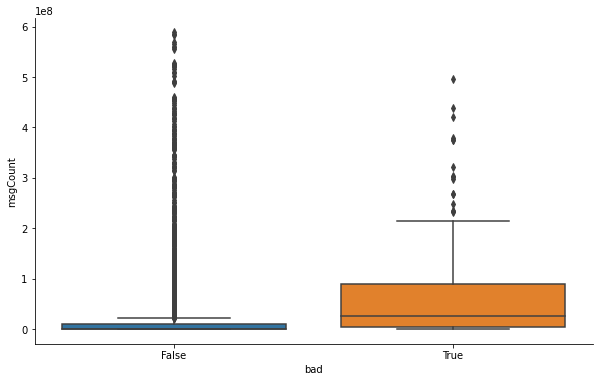

In [323]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = "bad",
            y = "msgCount",
            data = carriers[carriers['msgCount']<6e8],
            ax = ax)
sns.despine(right = True)
plt.show()

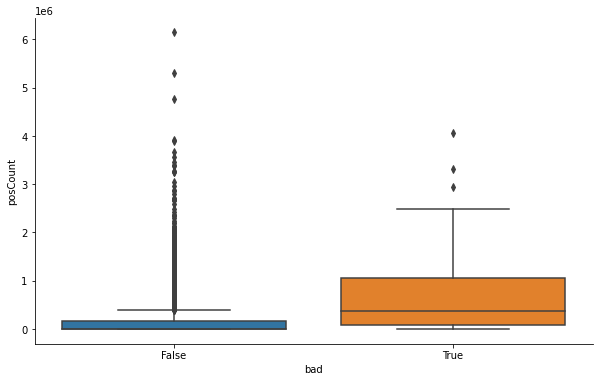

In [325]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = "bad",
            y = "posCount",
            data = carriers,
            ax = ax)
sns.despine(right = True)
plt.show()

In [349]:
Reefers = pd.read_csv('lists-Reefers-2022-10-05_08-09.csv')
Reefers['Year Built'] = Reefers['Year Built'].str.replace('00','01')
Reefers

,Antenna Offset from Bow,Antenna Offset from Port,Beam,Builder,Call Sign,Cargo Type,Class Society,COG,Beneficial Owner,Deadweight,...,Speed,Status,Sub Status,Subtype,Time of Fix (formatted),Time of Fix (s since 1970),Vessel Type,Year Built,Design Speed,Double Hull
0,111.0,6.0,21.0,Shin Kurushima Onishi,3FYF8,0-AllShips,Lloyd's Register,258.3,Greece,9727.0,...,0.0,S,In Service/Commission,Refrigerated Cargo Ship,"""2022-10-01T16:20:40.000Z""",1.664641e+09,7-Cargo,09/09/1988,18.50,NaN
1,84.0,14.0,14.0,NaN,HQXO6,0-AllShips,NaN,93.9,NaN,NaN,...,0.0,NaN,NaN,NaN,"""2021-08-06T07:08:13.000Z""",1.628234e+09,20-WIG,NaN,NaN,NaN
2,125.0,14.0,24.0,Shikoku Dockyard,3FGU,0-AllShips,Bureau Veritas,130.2,Greece,10447.0,...,15.5,S,In Service/Commission,Refrigerated Cargo Ship,"""2022-10-05T18:38:46.000Z""",1.664995e+09,7-Cargo,26/08/1998,21.00,NaN
3,20.0,2.0,7.0,Diedrich J Schiffswerft - GFR,9AA7641,0-AllShips,Croatian Register of Shipping,59.6,Croatia,100.0,...,1.5,S,In Service/Commission,Fishing Vessel,"""2022-09-26T16:53:04.000Z""",1.664211e+09,30-Fishing,23/11/1972,10.00,SH
4,105.0,12.0,20.0,NaN,A8TR8,9-NoInfo,NaN,237.9,NaN,NaN,...,0.3,NaN,NaN,NaN,"""2021-07-25T08:26:45.000Z""",1.627202e+09,7-Cargo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,NaN,NaN,NaN,Kirova - Khabarovsk - RUS,NaN,NaN,NaN,NaN,Russia,529.0,...,NaN,S,In Service/Commission,Fish Carrier,NaN,NaN,NaN,1992-01-01,11.25,SH
1916,NaN,NaN,NaN,60-letiya SSSR SSZ,NaN,NaN,NaN,NaN,Russia,591.0,...,NaN,S,In Service/Commission,Fishing Vessel,NaN,NaN,NaN,NaN,12.50,SH
1917,NaN,NaN,NaN,Qiuxin Shipyard - CHR,NaN,NaN,China Classification Society,NaN,NaN,159.0,...,NaN,S,In Service/Commission,Refrigerated Cargo Ship,NaN,NaN,NaN,NaN,0.00,NaN
1918,NaN,NaN,NaN,Qiuxin Shipyard - CHR,NaN,NaN,China Classification Society,NaN,NaN,159.0,...,NaN,S,In Service/Commission,Refrigerated Cargo Ship,NaN,NaN,NaN,NaN,0.00,NaN


In [350]:
Reefers.describe()

,Antenna Offset from Bow,Antenna Offset from Port,Beam,COG,Deadweight,Design Draft,Draft Present Load,ETA,Gross Tonnage,Heading,IMO Number,Latitude,Length,Longitude,MMSI,Sat Com,Speed,Time of Fix (s since 1970),Design Speed
count,1818.000000,1818.000000,1818.000000,1866.000000,1086.000000,1081.000000,1818.000000,1.818000e+03,1323.000000,1866.000000,1.819000e+03,1866.000000,1818.000000,1866.000000,1.920000e+03,1.460000e+02,1866.000000,1.866000e+03,1323.000000
mean,60.468097,7.080308,13.890539,157.309271,9868.871087,6.446601,4.067162,6.016956e+06,6340.582766,165.882369,1.669609e+07,25.873345,84.238724,52.965711,4.012937e+08,3.383829e+08,4.150750,1.654911e+09,10.553681
std,52.003311,5.883724,9.651757,115.496612,27189.802248,2.916233,3.311532,4.428142e+06,15742.964819,111.506450,8.984784e+07,27.072704,63.034390,90.168159,1.272312e+08,1.838391e+08,7.882727,1.989001e+07,7.354452
min,0.000000,0.000000,0.000000,-1.000000,2.000000,1.200000,0.000000,0.000000e+00,49.000000,-1.000000,0.000000e+00,-87.464577,0.000000,-223.550227,1.009000e+08,1.102574e+06,-1.000000,1.575140e+09,0.000000
25%,16.000000,3.000000,8.000000,45.225000,982.000000,4.340000,0.000000,2.460000e+03,497.000000,65.850000,0.000000e+00,5.630877,34.000000,0.007810,3.068838e+08,3.354639e+08,0.000000,1.655907e+09,0.000000
50%,53.000000,6.000000,14.000000,155.250000,3948.500000,6.325000,4.500000,8.271000e+06,2581.000000,168.050000,8.802571e+06,32.302755,83.000000,91.709251,3.674374e+08,4.288287e+08,0.100000,1.664974e+09,12.500000
75%,95.000000,10.000000,18.000000,261.275000,7961.500000,7.766000,6.300000,1.004160e+07,6500.500000,262.925000,9.171702e+06,44.295155,125.000000,128.213480,5.250040e+08,4.364223e+08,7.600000,1.665000e+09,15.500000
max,476.000000,63.000000,126.000000,359.700000,311681.000000,23.500000,25.500000,1.531301e+07,228741.000000,510.000000,9.812341e+08,73.873360,752.000000,179.944925,9.825700e+08,6.353773e+08,98.600000,1.665001e+09,45.000000


In [361]:

(pd.Timestamp.today() - pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])).mean()/365

/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/4265262581.py:1: UserWarning: Parsing '26/08/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  (pd.Timestamp.today() - pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])).mean()/365
/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/4265262581.py:1: UserWarning: Parsing '23/11/1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  (pd.Timestamp.today() - pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])).mean()/365
/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/4265262581.py:1: UserWarning: Parsing '27/06/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  (pd.Timestamp.today() - pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])).mean()/365
/var/folders/r3/cnkmcq_x3_v0

Timedelta('23 days 14:12:38.686231432')

In [336]:
pd.Timestamp.today() -Reefers['Year Built'].mean()

TypeError: can only concatenate str (not "int") to str

In [356]:
pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])

/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/3450141604.py:1: UserWarning: Parsing '26/08/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])
/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/3450141604.py:1: UserWarning: Parsing '23/11/1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])
/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/3450141604.py:1: UserWarning: Parsing '27/06/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(Reefers[Reefers['Year Built'].notnull()]['Year Built'])
/var/folders/r3/cnkmcq_x3_v0lk2gl38xts4c0000gn/T/ipykernel_73835/3450141604.py:1: UserWarning: Parsing '14/02/1998' in DD/MM/YYYY format

0      1988-09-09
2      1998-08-26
3      1972-11-23
5      1992-06-27
8      1998-02-14
          ...    
1892   1983-02-26
1896   1986-09-25
1907   1989-08-24
1915   1992-01-01
1919   2015-10-13
Name: Year Built, Length: 973, dtype: datetime64[ns]

<AxesSubplot:xlabel='count', ylabel='Flag'>

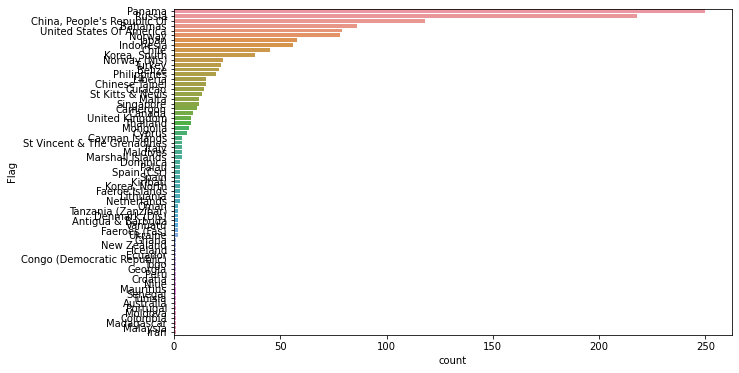

In [364]:
fig, ax = plt.subplots( figsize=(10, 6))
sns.countplot(y = 'Flag',
              data = Reefers,
              order = Reefers['Flag'].value_counts().index,
              ax = ax)

In [365]:
Reefers['Flag'].value_counts().index

Index(['Panama', 'Russia', 'China, People's Republic Of', 'Bahamas',
       'United States Of America', 'Norway', 'Japan', 'Indonesia', 'Chile',
       'Korea, South', 'Norway (Nis)', 'Turkey', 'Belize', 'Philippines',
       'Liberia', 'Chinese Taipei', 'Curacao', 'St Kitts & Nevis', 'Malta',
       'Singapore', 'Cameroon', 'Canada', 'United Kingdom', 'Thailand',
       'Mongolia', 'Cyprus', 'Cayman Islands', 'St Vincent & The Grenadines',
       'Italy', 'Maldives', 'Marshall Islands', 'Dominica', 'Palau',
       'Spain (Csr)', 'Spain', 'Kiribati', 'Korea, North', 'Faeroe Islands',
       'Lithuania', 'Netherlands', 'Oman', 'Tanzania (Zanzibar)',
       'Denmark (Dis)', 'Antigua & Barbuda', 'Vanuatu', 'Faeroes (Fas)',
       'Ukraine', 'Ghana', 'New Zealand', 'Iceland', 'Ecuador',
       'Congo (Democratic Republic)', 'Togo', 'Georgia', 'Peru', 'Croatia',
       'Niue', 'Mauritius', 'Senegal', 'Tunisia', 'Australia', 'Portugal',
       'Moldova', 'Colombia', 'Madagascar', 'Malaysia',

In [366]:
Reefers['Flag'].count()

1323

In [368]:
top6=['Panama', 'Russia', 'China, Peoples Republic Of', 'Bahamas',
       'United States Of America']
Reefers[Reefers['Flag'].isin(top6) ]['Flag'].count()/Reefers['Flag'].count()

0.47845804988662133

In [369]:
2240*9868.87

22106268.8

In [372]:
Reefers['IMO Number'].isin(bad).sum()

115

In [373]:
Reefers[Reefers['IMO Number'].isin(bad)].describe()

,Antenna Offset from Bow,Antenna Offset from Port,Beam,COG,Deadweight,Design Draft,Draft Present Load,ETA,Gross Tonnage,Heading,IMO Number,Latitude,Length,Longitude,MMSI,Sat Com,Speed,Time of Fix (s since 1970),Design Speed
count,115.000000,115.000000,115.000000,115.000000,99.000000,99.000000,115.000000,1.150000e+02,101.00000,115.000000,1.150000e+02,115.000000,115.000000,115.000000,1.150000e+02,1.000000e+01,115.000000,1.150000e+02,101.000000
mean,67.721739,8.669565,15.295652,171.123478,5032.727273,6.413343,5.703478,8.144942e+06,5705.29703,162.470435,1.553696e+07,33.444513,99.600000,88.587826,3.618579e+08,1.630087e+08,3.711304,1.660663e+09,13.587228
std,36.508482,4.699238,5.916041,115.111533,4877.713595,1.716984,1.827995,2.922541e+06,6807.03769,103.257503,7.286496e+07,21.709970,42.310216,90.161360,1.160818e+08,2.109517e+08,7.533117,1.367728e+07,4.736428
min,0.000000,0.000000,0.000000,-1.000000,190.000000,3.150000,0.000000,0.000000e+00,273.00000,-1.000000,2.370000e+02,-35.165690,0.000000,-179.128970,2.141827e+08,1.201540e+06,0.000000,1.579754e+09,0.000000
25%,33.500000,5.000000,12.000000,73.550000,1817.500000,5.030000,4.800000,8.135400e+06,2009.00000,75.000000,8.609286e+06,22.481907,72.000000,24.575167,2.733907e+08,1.350220e+06,0.000000,1.664896e+09,12.200000
50%,71.000000,9.000000,16.000000,180.000000,3959.000000,6.500000,5.800000,9.210800e+06,3989.00000,164.000000,8.897588e+06,35.099908,101.000000,128.999633,3.551410e+08,1.377768e+06,0.100000,1.664993e+09,14.500000
75%,100.000000,12.000000,20.000000,281.100000,7367.500000,7.734500,6.900000,1.004130e+07,7765.00000,240.000000,9.121126e+06,45.802307,134.000000,143.221894,3.748055e+08,4.012818e+08,7.750000,1.665000e+09,16.000000
max,185.000000,18.000000,32.000000,359.600000,36484.000000,10.500000,10.000000,1.231236e+07,49367.00000,352.000000,7.900663e+08,70.508030,228.000000,179.435000,6.360182e+08,4.416567e+08,67.100000,1.665001e+09,21.000000


In [374]:
2240* 5032.72

11273292.8

In [375]:
Reefers[Reefers['IMO Number'].isin(bad)]['Flag'].value_counts().index

Index(['Russia', 'Panama', 'Chinese Taipei', 'Korea, South', 'Cameroon',
       'Japan', 'Norway', 'Liberia', 'Norway (Nis)', 'Vanuatu',
       'China, People's Republic Of', 'Singapore'],
      dtype='object')

In [378]:
top6=['Russia', 'Panama', 'Chinese Taipei']
Reefers[Reefers['IMO Number'].isin(bad)][Reefers[Reefers['IMO Number'].isin(bad)]['Flag'].isin(top6) ]['Flag'].count()/Reefers[Reefers['IMO Number'].isin(bad)]['Flag'].count()

0.8217821782178217

<AxesSubplot:xlabel='count', ylabel='Flag'>

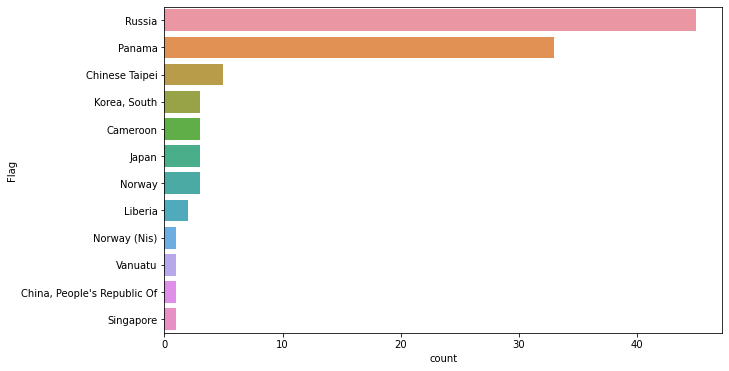

In [377]:
fig, ax = plt.subplots( figsize=(10, 6))
sns.countplot(y = 'Flag',
              data = Reefers[Reefers['IMO Number'].isin(bad)],
              order = Reefers[Reefers['IMO Number'].isin(bad)]['Flag'].value_counts().index,
              ax = ax)